In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
!pip install fastai

In [11]:
#hide
from fastbook import *
import os
import shutil

In [ ]:
# Path of images aftter extracting the tgz file
path = os.path.join(os.getcwd(),'102flowers','jpg')
images = os.listdir(path)
images

In [ ]:
# Adding the path of directory to images
images = [os.path.join(path, each) for each in images]
len(images)

In [6]:
# reading the image labels from the .txt file
with open(os.path.join(os.getcwd(),'102flowers','labels.txt'),'r') as f:
    labels = f.readlines()
len(labels)

8189

In [7]:
len(images), len(labels)

(8189, 8189)

In [11]:
labels[-3]

'62'

In [ ]:
labels = [each.replace("\n","") for each in labels]

In [2]:
# new folder path for the images
new_dataset_folder = Path('images')

In [37]:
# deleting the folder if necessary
if new_dataset_folder.exists():
    shutil.rmtree(new_dataset_folder)

In [38]:
# segregate the images and labels into respective folder of images with label as name
if not new_dataset_folder.exists():
    os.mkdir(new_dataset_folder)
    for i in range(len(labels)):
        dest = (new_dataset_folder/labels[i])
        if not (new_dataset_folder/labels[i]).exists():
            os.mkdir(dest)
        else:
            # print(os.path.join(path, labels[i]), os.path.join(dest))
            shutil.copy(os.path.join(path, images[i]), os.path.join(dest))

In [43]:
# unlink the files
failed = verify_images(get_image_files(new_dataset_folder))
failed.map(Path.unlink);

<function fastai.data.transforms.get_image_files(path, recurse=True, folders=None)>

In [3]:
get_image_files, parent_label, path, new_dataset_folder, dest

NameError: name 'path' is not defined

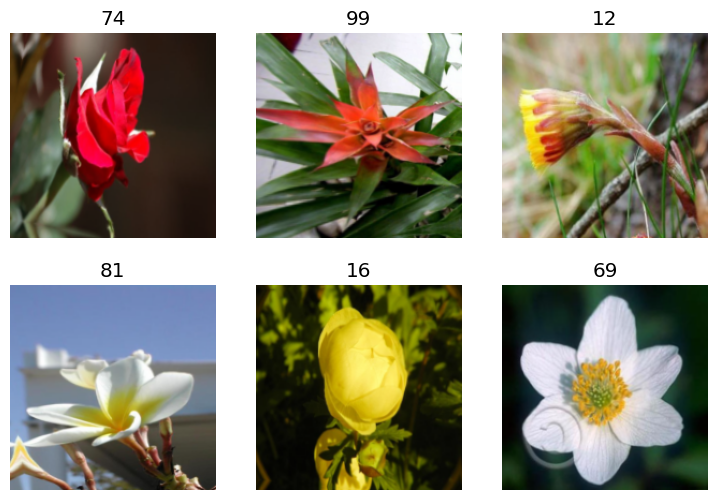

In [4]:
# data loader of images with augmentations
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(192, method='squish'),
    batch_tfms=aug_transforms()
).dataloaders(new_dataset_folder)

dls.show_batch(max_n=6)

In [5]:
# define the resnet50
learn = vision_learner(dls, resnet50, metrics=error_rate)

SuggestedLRs(valley=0.0008317637839354575)

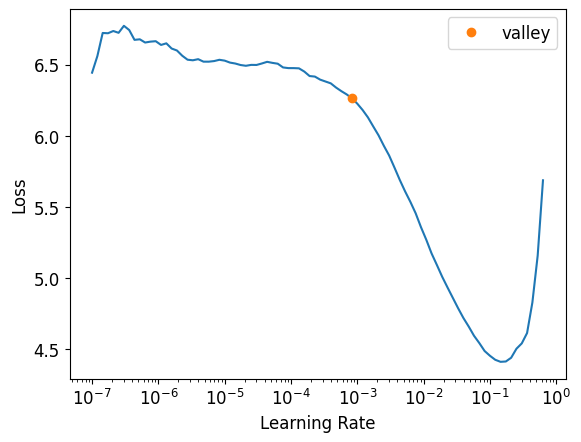

In [6]:
# helps find the optimal learning rate
learn.lr_find()

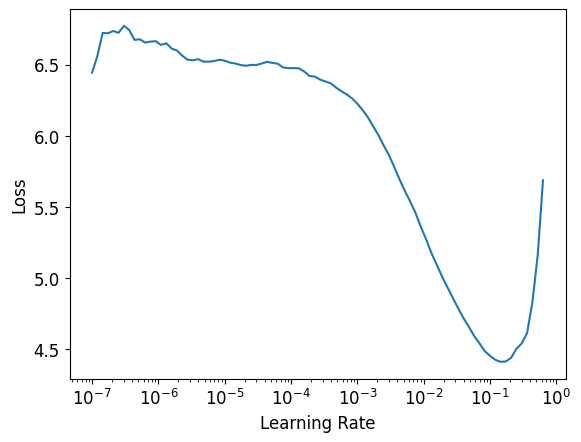

In [7]:
learn.recorder.plot_lr_find()

In [8]:
from fastai.callback.tracker import EarlyStoppingCallback

In [ ]:
# Use lr=1e-3 based on the graph observation
lr = 1e-3
# fine tune the model
learn.fine_tune(10, base_lr=lr, cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=3)])

In [ ]:
learn.fine_tune(3)

In [8]:
import ipywidgets as widgets

In [9]:
# validate the images with upload button
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [12]:
# take image path if widget not supported
uploader = SimpleNamespace(data = ['D:\Sathwik\Fellowship.AI\Test\9\image_06439.jpg'])

In [16]:
# predict on images with probability
img = PILImage.create(uploader.data[0])
flower,_,probs = learn.predict(img)
print(f"Whats the flower category?: {flower}.")
print(f"Probability: {probs[0]}")
print(f"Probability: {probs[1]}")

Whats the flower category?: 9.
Probability: 0.00018737932259682566
Probability: 6.89037551637739e-05


In [18]:
learn.export('model.pkl')

In [6]:
from fastai.learner import load_learner

# Load the learner
learn = load_learner('model.pkl')